
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Machine Learning & Classification <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [1]:
# please fill in your student number and name
student_number = '401107613'
Name = 'Kimia'
Last_Name = 'Vanaei'

## Logistic Regression (50 points)

In this notebook, we will explore the fundamentals of classification in machine learning by implementing Logistic Regression from scratch, step by step.

#### Libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### From scratch implementation (20 points)

- **Sigmoid Function**: Logistic Regression models the probability of a class label as:  
  
  $$
  P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = X \cdot w
  $$

  where $ w $ is the weight vector, $ X $ is the feature matrix, and $ \sigma(z) $ maps the input to a value between 0 and 1.

- **Binary Cross-Entropy Loss**: To train the model, we minimize the binary cross-entropy loss:  

  $$
  \mathcal{L} = -\frac{1}{n} \sum_{i=1}^n \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
  $$  

  Here, $ y_i $ is the true label, and $ \hat{y}_i $ is the predicted probability.

- **Gradient Descent (GD)**: To optimize the weights, we use Gradient Descent, an iterative algorithm that updates the weights in the direction of the negative gradient of the loss:  

  $$
  w \gets w - \alpha \cdot \nabla \mathcal{L}
  $$  

  where $ \alpha $ is the learning rate and $ \nabla \mathcal{L} $ is the gradient.



The class `LogisticRegressionGD` implements logistic regression with the following features:
- Binary classification using the sigmoid function.
- Training using gradient descent with a configurable learning rate, number of steps, and convergence tolerance.
- Validation accuracy tracking and loss history for monitoring training progress.
- Prediction capability and a confusion matrix visualization.

Let’s now implement this step by step and evaluate its performance on a classification dataset.

In [65]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.1, n_steps=1000, tolerance=1e-6):
        """
        Initialize the parameters for the Logistic Regression model.
        """
        self.learning_rate = learning_rate
        self.n_steps = n_steps
        self.tolerance = tolerance
        self.weights = None
        self.loss_history = []  # To store training loss at each step
        self.val_accuracy_history = []  # To store validation accuracy at each step

    def sigmoid(self, z):
        """
        Apply the sigmoid function to scalar, vector, or matrix.
        """
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute the binary cross-entropy loss for the current weights.
        """
        m = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        loss = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss

    def compute_gradient(self, X, y):
        """
        Compute the gradient of the loss function with respect to the weights.
        """
        m = X.shape[0]  
        predictions = self.sigmoid(np.dot(X, self.weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        return gradient

    def test_accuracy(self, X_test, y_test):
        """
        Compute the accuracy of the model on test data.
        """
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return accuracy

    def fit(self, X_train, y_train, X_val, y_val):
        """
        Train the Logistic Regression model using gradient descent.
        """
        n_features = X_train.shape[1]
        self.weights = np.zeros(n_features)

        for step in range(self.n_steps):
            gradient = self.compute_gradient(X_train, y_train)
            self.weights -= self.learning_rate * gradient

            train_loss = self.compute_loss(X_train, y_train)
            val_accuracy = self.test_accuracy(X_val, y_val)
            
            self.loss_history.append(train_loss)
            self.val_accuracy_history.append(val_accuracy)

            if np.linalg.norm(gradient) < self.tolerance:
                print(f"Convergence reached at step {step}.")
                break

            if step % 100 == 0:                
                print(f"Step {step}: Loss = {train_loss:.4f}, Validation Accuracy = {val_accuracy:.4f}")

    def predict(self, X):
        """
        Predict binary labels for given data.
        """
        probabilities = self.sigmoid(np.dot(X, self.weights))
        return (probabilities >= 0.5).astype(int)

    def plot_confusion_matrix(self, X_test, y_test, labels):
        """
        Plot the confusion matrix for the validation data.
        """
        predictions = self.predict(X_test)
        cm = confusion_matrix(y_test, predictions)

        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(labels))
        plt.xticks(tick_marks, labels, rotation=45)
        plt.yticks(tick_marks, labels)

        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, cm[i, j], ha="center", va="center", color="red")

        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.tight_layout()
        plt.show()

Now that you have implemented the Logistic Regression class, let's test it on a sample dummy dataset and visualize the decision boundary:

Step 0: Loss = 0.6613, Validation Accuracy = 0.9400
Step 100: Loss = 0.1629, Validation Accuracy = 0.9800
Step 200: Loss = 0.1154, Validation Accuracy = 0.9800
Step 300: Loss = 0.0958, Validation Accuracy = 0.9800
Step 400: Loss = 0.0846, Validation Accuracy = 0.9800
Step 500: Loss = 0.0773, Validation Accuracy = 1.0000
Step 600: Loss = 0.0721, Validation Accuracy = 1.0000
Step 700: Loss = 0.0681, Validation Accuracy = 1.0000
Step 800: Loss = 0.0650, Validation Accuracy = 1.0000
Step 900: Loss = 0.0625, Validation Accuracy = 1.0000
Test Accuracy: 100.00%


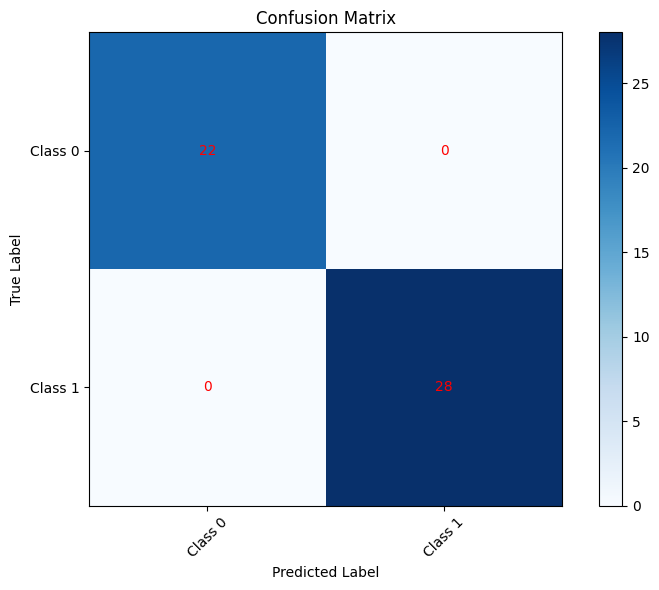

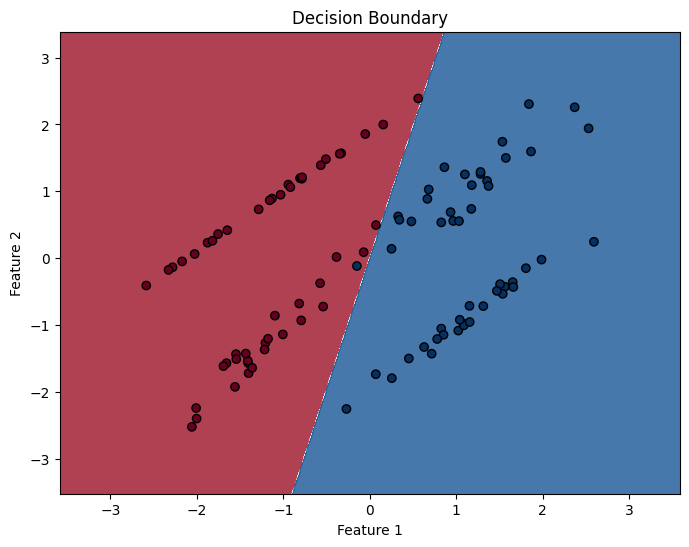

In [66]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)
model.fit(X_train, y_train, X_test, y_test)

test_accuracy = model.test_accuracy(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

model.plot_confusion_matrix(X_test, y_test, labels=["Class 0", "Class 1"])

# Visualize the decision boundary
def plot_decision_boundary(self, X, y):
        """
        Plot the decision boundary for a 2D dataset.
        """
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probabilities = self.sigmoid(np.dot(grid, self.weights))
        Z = (probabilities >= 0.5).astype(int).reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.RdBu)
        plt.title("Decision Boundary")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

plot_decision_boundary(model, X, y)

### Towards real numerical datasets (15 points)

With our tools ready, we'll now work with the Breast Cancer dataset from scikit-learn—a classic binary classification dataset commonly used in machine learning. This dataset includes various features describing tumors, along with their corresponding labels (benign or malignant).

In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA


data = load_breast_cancer()
X, y = data.data, data.target
print("Features:", data.feature_names)
print("Target names:", data.target_names)


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


As you are familiar with, adding bias term 1 is necessary as well:

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Since the dataset has a high number of features, we will use dimensionality reduction to make it easier to visualize. For this purpose, we will apply Principal Component Analysis (PCA):

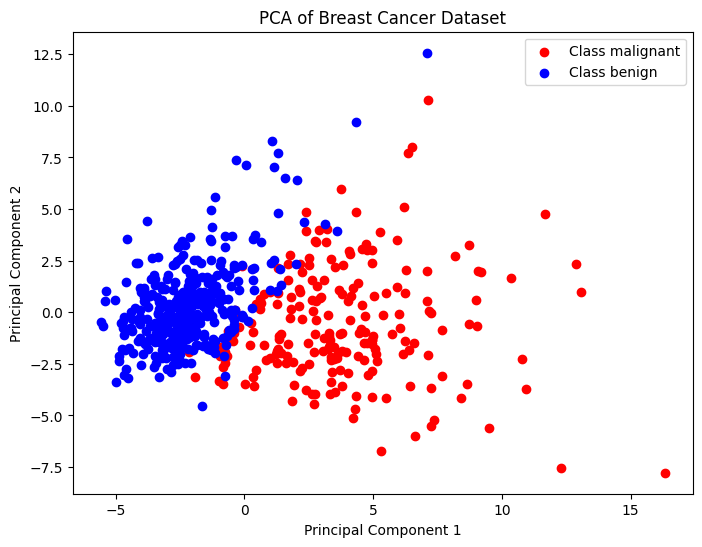

In [69]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for class_label, color, label_name in zip([0, 1], ['red', 'blue'], data.target_names):
    plt.scatter(
        X_pca[y == class_label, 0],
        X_pca[y == class_label, 1], 
        color=color,
        label=f"Class {label_name}"
    )

plt.title("PCA of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Finally, we will train the Logistic Regression model on this dataset. We will visualize the loss reduction during training and evaluate the model's performance using a confusion matrix:

In [70]:
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)
model.fit(X_train, y_train, X_test, y_test)

test_accuracy = model.test_accuracy(X_test, y_test)
print(f"Test Accuracy: {test_accuracy :.4f}")

Step 0: Loss = 0.5265, Validation Accuracy = 0.9649
Step 100: Loss = 0.1054, Validation Accuracy = 0.9912
Step 200: Loss = 0.0868, Validation Accuracy = 0.9912
Step 300: Loss = 0.0786, Validation Accuracy = 0.9825
Step 400: Loss = 0.0736, Validation Accuracy = 0.9825
Step 500: Loss = 0.0701, Validation Accuracy = 0.9825
Step 600: Loss = 0.0675, Validation Accuracy = 0.9825
Step 700: Loss = 0.0654, Validation Accuracy = 0.9825
Step 800: Loss = 0.0638, Validation Accuracy = 0.9825
Step 900: Loss = 0.0623, Validation Accuracy = 0.9825
Test Accuracy: 0.9825


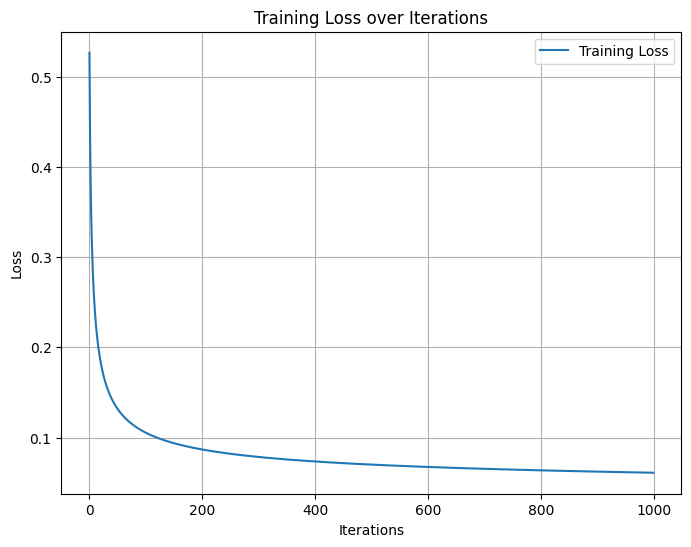

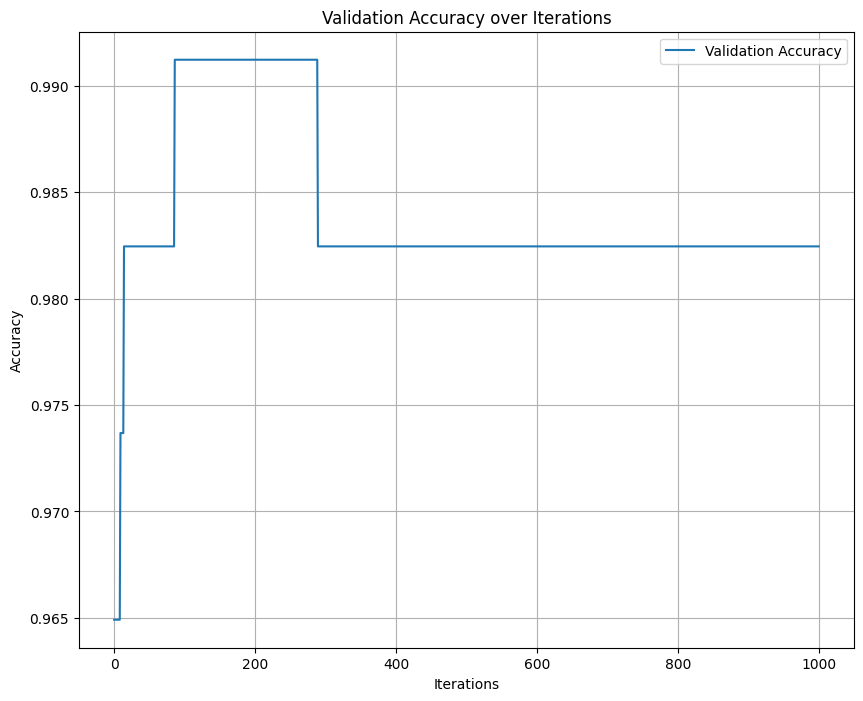

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(model.loss_history, label='Training Loss')
plt.title('Training Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(model.val_accuracy_history, label='Validation Accuracy')
plt.title('Validation Accuracy over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


**Why does the validation accuracy show a slight decrease?**

- As the model continues to train, it starts fitting the training data more closely. This can lead to overfitting, where the model performs well on the training set but generalizes poorly to unseen validation data.

- If the validation set contains noisy or difficult-to-classify samples, small fluctuations in validation accuracy can occur naturally as the model parameters are updated.

- Smaller batch sizes can lead to noisier gradient updates, causing slight fluctuations in accuracy.

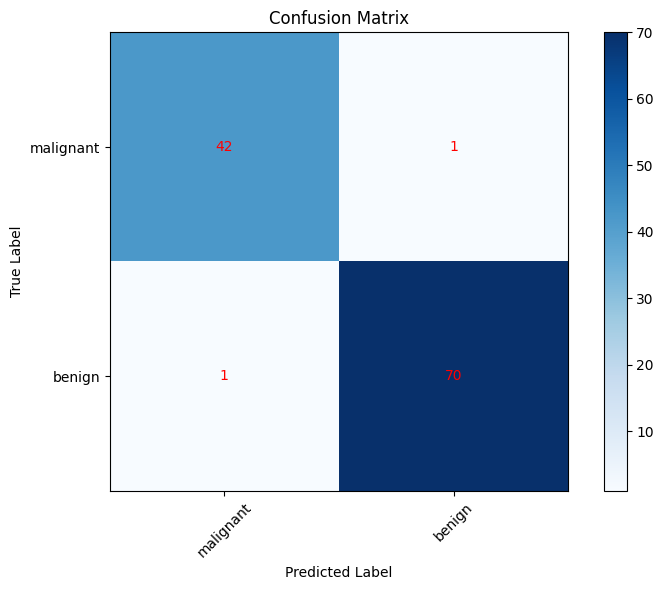

In [72]:
model.plot_confusion_matrix(X_test, y_test, labels=data.target_names)

### Towards real non-numerical datasets (15 points)

Up to this point, you have successfully implemented Logistic Regression from scratch and applied it to a numerical dataset (the Breast Cancer dataset, where all features were numerical).

Now, let’s take it a step further by applying your classifier to a non-numerical dataset. We will use the [Rotten Tomatoes Reviews dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset), a popular dataset for sentiment analysis. This dataset contains movie reviews categorized into two classes: 'rotten' and 'fresh', representing binary sentiment classification.

To work with this dataset, we will first create embedding vectors for the text data. These embeddings will numerically represent each review and allow us to classify them based on their content. The focus will be on building meaningful embeddings that capture the essence of the reviews and using Logistic Regression to perform sentiment classification.

If you're using Google Colab, you can use the following cells to download and unzip the dataset directly. Alternatively, you may choose to download and extract it manually on your device

In [ ]:
import os

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
!unzip rotten-tomatoes-movies-and-critic-reviews-dataset.zip

#### Requierments
Please make sure that NLTK is available before proceeding to the next cells

In [73]:
!pip install nltk

#### Libraries

In [74]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from collections import defaultdict

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Since the dataset is quite large, we will focus on a subset of the data by selecting only reviews from top critics and movies with non-NaN review scores. Let's load this subset into a DataFrame and display the first couple of rows

In [75]:
df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Filter out rows where 'top_critic' is not True and 'score' is NaN
reviews = df[df['top_critic'] == True].dropna(subset=['review_score'])

print(reviews.head())


   rotten_tomatoes_link       critic_name  top_critic       publisher_name  \
7             m/0814255  Bill Goodykoontz        True     Arizona Republic   
9             m/0814255      Jim Schembri        True  The Age (Australia)   
11            m/0814255       Roger Moore        True     Orlando Sentinel   
12            m/0814255     David Jenkins        True             Time Out   
21            m/0814255    Stephen Holden        True       New York Times   

   review_type review_score review_date  \
7        Fresh        3.5/5  2010-02-10   
9        Fresh          3/5  2010-02-10   
11      Rotten          2/4  2010-02-10   
12      Rotten          2/5  2010-02-10   
21      Rotten          2/5  2010-02-11   

                                       review_content  
7   Percy Jackson isn't a great movie, but it's a ...  
9   Crammed with dragons, set-destroying fights an...  
11  For what it is and for whom it is intended, it...  
12  Chris Columbus returns to his comfort zone f

To work with the text data, we need to preprocess it. For simplicity, we will perform the following preprocessing steps:
- Convert the text to lowercase
- Remove non-English characters
- Eliminate common English stopwords
- Apply lemmatization using NLTK

Since the dataset is quite large, performing this preprocessing on the CPU may take some time. If you have access to a GPU (either through Google Colab or your local device), we recommend setting the runtime_env to GPU for faster preprocessing. This will significantly speed up the process!

In [76]:
runtime_env = 'CPU' # or CPU

In [77]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

if runtime_env == 'GPU':
  import cudf
  import cupy as cp

  def preprocess_text_gpu(text_series):
      text_series = cudf.Series(text_series)
      text_series = text_series.str.lower()
      text_series = text_series.str.replace(r'[^a-z\s]', '', regex=True)
      text_series = text_series.to_pandas()

      processed_texts = []
      for text in text_series:
          tokens = word_tokenize(text)
          tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
          processed_texts.append(' '.join(tokens))
      return processed_texts

  reviews['processed_content'] = preprocess_text_gpu(reviews['review_content'].astype(str))

elif runtime_env == 'CPU':
  def preprocess_text(text):
      text = text.lower()
      text = re.sub(r'[^a-z\s]', '', text)
      tokens = word_tokenize(text)
      tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
      return ' '.join(tokens)

  reviews['processed_content'] = reviews['review_content'].astype(str).apply(preprocess_text)

print(reviews[['review_type', 'review_content', 'processed_content']].head())

   review_type                                     review_content  \
7        Fresh  Percy Jackson isn't a great movie, but it's a ...   
9        Fresh  Crammed with dragons, set-destroying fights an...   
11      Rotten  For what it is and for whom it is intended, it...   
12      Rotten  Chris Columbus returns to his comfort zone for...   
21      Rotten  Although the standard allegorical bases for my...   

                                    processed_content  
7   percy jackson isnt great movie good one trotti...  
9   crammed dragon setdestroying fight thing explo...  
11                 intended bad movie indifferent one  
12  chris columbus return comfort zone mirthless e...  
21  although standard allegorical base mythicalque...  


Next, let’s visualize the distribution of the classes in the dataset.

This will help us determine whether the data is balanced between the two classes ('rotten' and 'fresh') or if there is an imbalance that might affect our model's performance.

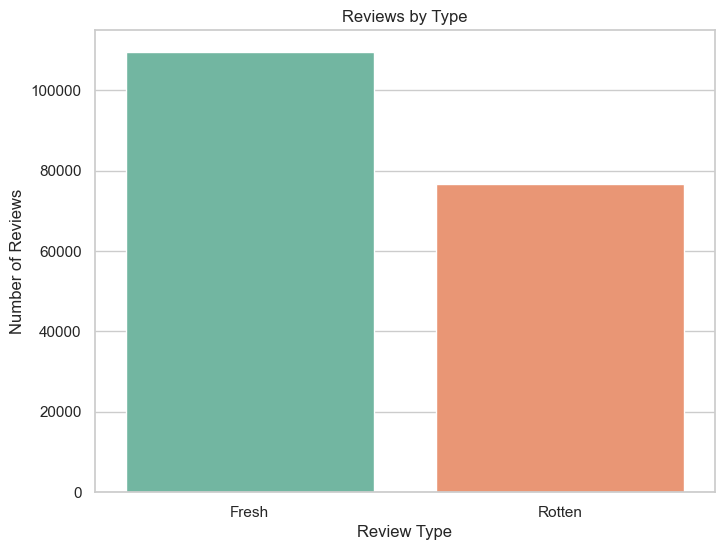

In [79]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=reviews, x='review_type', hue='review_type', palette='Set2', legend=False)

plt.title('Reviews by Type')
plt.xlabel('Review Type')
plt.ylabel('Number of Reviews')
plt.show()

In sentiment analysis, we often face the challenge of working with non-numerical data, such as text. To address this, we use [embeddings](https://www.geeksforgeeks.org/what-are-embeddings-in-machine-learning/). An embedding is a method for converting non-numerical data (like words or sentences) into numerical vectors, which can be processed by machine learning algorithms.

Embeddings can be fixed-size or variable-length, and there are many techniques to create them. Some embeddings, like GloVe and Word2Vec, are based on the context of words in a corpus. These methods capture semantic meaning by considering how words relate to each other in context. Alternatively, simpler embeddings, such as Bag-of-Words (BoW), are based on word frequencies within the text.

In this case, we will implement a simple approach. Instead of using pre-trained embeddings, we will create our own using word frequencies within the two classes: Fresh and Rotten.

Here’s the process:

1. Term Frequency (TF): We calculate the frequency of each word in the Fresh and Rotten reviews.
2. Document Frequency (DF): For each word, we calculate the number of reviews (documents) in which it appears.
3. TF-IDF Representation: Each review will be represented as a vector of two numbers:
  - The first number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Rotten class.
  - The second number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Fresh class.
4. Normalization: To ensure consistent scale and improve the performance of our model, we normalize the resulting vector.

This embedding is widely known as [TF-IDF](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/). It helps represent text by emphasizing words that are important to a specific document while reducing the influence of commonly occurring words across the dataset

In [80]:
from collections import Counter
from sklearn.preprocessing import normalize
import numpy as np

fresh_reviews = reviews[reviews['review_type'] == 'Fresh']['processed_content']
rotten_reviews = reviews[reviews['review_type'] == 'Rotten']['processed_content']

def compute_tf(reviews):
    term_frequencies = defaultdict(int)
    for review in reviews:
        words = review.split()
        word_counts = Counter(words)
        for word, count in word_counts.items():
            term_frequencies[word] += count
    return term_frequencies

fresh_tf = compute_tf(fresh_reviews)
rotten_tf = compute_tf(rotten_reviews)

def compute_df(reviews):
    doc_frequencies = defaultdict(int)
    for review in reviews:
        words = set(review.split())
        for word in words:
            doc_frequencies[word] += 1
    return doc_frequencies

all_reviews = reviews['processed_content']
df = compute_df(all_reviews)

def compute_tfidf_vector(review, tf_class, df, total_docs):
    tfidf_vector = np.zeros(2)  # [TF-IDF_Rotten, TF-IDF_Fresh]
    words = review.split()
    for word in words:
        if word in df:
            idf = np.log(total_docs / df[word])  # IDF
            tfidf_vector[0] += tf_class.get(word, 0) * idf  # Rotten
            tfidf_vector[1] += fresh_tf.get(word, 0) * idf  # Fresh
    return tfidf_vector

total_docs = len(all_reviews)
reviews['tfidf_vector'] = reviews['processed_content'].apply(
    lambda x: compute_tfidf_vector(x, rotten_tf, df, total_docs)
)

tfidf_matrix = np.array(reviews['tfidf_vector'].tolist())
normalized_tfidf = normalize(tfidf_matrix, axis=1)

reviews['tfidf_normalized'] = list(normalized_tfidf)

print(reviews[['review_type', 'tfidf_vector', 'tfidf_normalized']].head())


   review_type                              tfidf_vector  \
7        Fresh   [90341.29230634852, 117035.77331224698]   
9        Fresh  [18216.491413959346, 29174.308312950558]   
11      Rotten     [50349.25337213457, 57821.4380604366]   
12      Rotten  [15327.140900776069, 18413.382960505143]   
21      Rotten   [85546.83800172171, 103990.80034843524]   

                            tfidf_normalized  
7   [0.6110432278364563, 0.7915972294767109]  
9   [0.5296340291064805, 0.8482262641609464]  
11  [0.6566965321676355, 0.7541549341077082]  
12  [0.6397570346081558, 0.7685772158146368]  
21   [0.635297195763052, 0.7722677469994472]  


In [81]:
total_docs = len(all_reviews)

idf = {word: np.log(total_docs / df[word]) for word in df}

embedding_vectors = {}

for word in idf.keys():
    fresh_score = fresh_tf.get(word, 0) * idf[word]
    rotten_score = rotten_tf.get(word, 0) * idf[word]
    embedding_vectors[word] = [fresh_score, rotten_score]

print({k: embedding_vectors[k] for k in list(embedding_vectors.keys())[:10]})

{'channel': [397.5575212361413, 578.2654854343874], 'movie': [30106.506032249483, 25875.595472702447], 'like': [18541.489546797413, 18203.362938735], 'mythology': [442.75945321020436, 251.9148613092542], 'jackson': [1139.8086841139464, 690.3984029490189], 'isnt': [7010.998973708286, 8341.072340954935], 'one': [23116.44278444265, 14264.062957929813], 'disney': [2211.162587851577, 1376.977218791292], 'greek': [409.30468855745744, 325.9278075550124], 'good': [14249.466361027213, 9173.176970064815]}


Next, we will use the Logistic Regression class that we implemented in previous sections to classify the reviews based on the embeddings we created.

Step 0: Loss = 0.6893, Validation Accuracy = 0.5906
Step 100: Loss = 0.6535, Validation Accuracy = 0.5987
Step 200: Loss = 0.6365, Validation Accuracy = 0.6183
Step 300: Loss = 0.6242, Validation Accuracy = 0.6431
Step 400: Loss = 0.6151, Validation Accuracy = 0.6617
Step 500: Loss = 0.6082, Validation Accuracy = 0.6726
Step 600: Loss = 0.6030, Validation Accuracy = 0.6804
Step 700: Loss = 0.5989, Validation Accuracy = 0.6846
Step 800: Loss = 0.5958, Validation Accuracy = 0.6876
Step 900: Loss = 0.5933, Validation Accuracy = 0.6898
Validation Accuracy: 0.6912


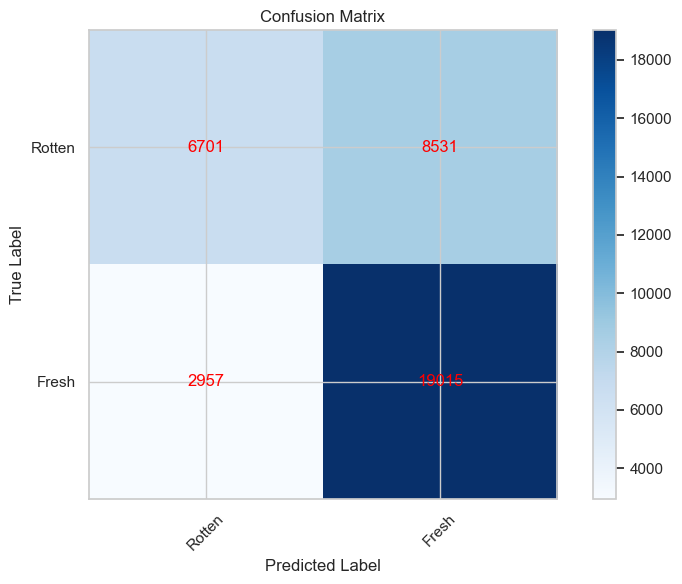

In [94]:
X = np.array(reviews['tfidf_normalized'].tolist())  
y = (reviews['review_type'] == 'Fresh').astype(int).values  # Binary labels: 1 for Fresh, 0 for Rotten

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegressionGD(learning_rate=0.5, n_steps=1000, tolerance=1e-6)
model.fit(X_train, y_train, X_val, y_val)

val_accuracy = model.test_accuracy(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

model.plot_confusion_matrix(X_val, y_val, labels=["Rotten", "Fresh"])

In [95]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
print(f"Validation accuracy: {val_accuracy:.4f}")
print(classification_report(y_val, y_pred, target_names=["Rotten", "Fresh"]))


Validation accuracy: 0.6912
              precision    recall  f1-score   support

      Rotten       0.69      0.44      0.54     15232
       Fresh       0.69      0.87      0.77     21972

    accuracy                           0.69     37204
   macro avg       0.69      0.65      0.65     37204
weighted avg       0.69      0.69      0.67     37204



## Decision Tree (50 points)

In this section, you will implement a **Decision Tree (DT)** from scratch. We will use the [Bank Marketing Dataset from the UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains a mix of **numerical** and **non-numerical** features.


### Libraries

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


First, let's load the dataset and inspect it:

In [97]:
#TODO: import dataset and inspect it
data = pd.read_csv('bank.csv', delimiter=';')
print("Dataset head:")
print(data.head().to_string(index=False))

Dataset head:
 age         job marital education default  balance housing loan  contact  day month  duration  campaign  pdays  previous poutcome  y
  30  unemployed married   primary      no     1787      no   no cellular   19   oct        79         1     -1         0  unknown no
  33    services married secondary      no     4789     yes  yes cellular   11   may       220         1    339         4  failure no
  35  management  single  tertiary      no     1350     yes   no cellular   16   apr       185         1    330         1  failure no
  30  management married  tertiary      no     1476     yes  yes  unknown    3   jun       199         4     -1         0  unknown no
  59 blue-collar married secondary      no        0     yes   no  unknown    5   may       226         1     -1         0  unknown no


### Implementation (20 points)

You will implement a class for a **Decision Tree** that includes:
1. **Entropy (H)** calculation.
2. **Information Gain (IG)** computation.
3. A method to split the dataset based on the best feature and decision thresholds.

**Entropy (H):** Entropy is a measure of the impurity or uncertainty of a dataset. It is given by:

$$ H(S) = - \sum_{i=1}^c p_i \log_2(p_i) $$

Where:
- $S$ is the dataset.
- $p_i$ is the proportion of samples in class $i$.
- $c$ is the total number of classes.

**Information Gain (IG):** Information Gain quantifies the reduction in entropy when a dataset is split on a particular feature. It is calculated as:

$$IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:
- $S$ is the dataset.
- $A$ is the feature used for the split.
- $\text{Values}(A)$ are the unique values of feature \(A\).
- $S_v$ is the subset of \(S\) where $A = v$.

The decision tree selects the feature and split point that maximizes the **Information Gain** at each node. The process is repeated recursively until:
1. The node becomes pure (contains only one class).
2. A stopping criterion like **maximum depth** is reached.


In [98]:
class DecisionTree:
    def __init__(self, max_depth=8):
        self.tree = None
        self.max_depth = max_depth

    def entropy(self, y):
        """Calculate the entropy of a dataset."""
        unique_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

    def information_gain(self, X, y, feature_index):
        """Calculate the information gain for a feature."""
        total_entropy = self.entropy(y)
        values = np.unique(X[:, feature_index])
        weighted_entropy = 0

        for value in values:
            subset_indices = X[:, feature_index] == value
            subset_y = y[subset_indices]
            weighted_entropy += (len(subset_y) / len(y)) * self.entropy(subset_y)

        return total_entropy - weighted_entropy

    def best_feature_to_split(self, X, y):
        """
        Find the best feature to split the dataset.
        Returns the index of the best feature.
        """
        best_feature = None
        best_IG = -1

        for feature_index in range(X.shape[1]):
            IG = self.information_gain(X, y, feature_index)
            if IG > best_IG:
                best_IG = IG
                best_feature = feature_index

        return best_feature

    def fit(self, X, y, depth=0):
        """
        Fit the decision tree to the training data.
        Args:
            X: 2D numpy array of feature values.
            y: 1D numpy array of target values.
            depth (int): Current depth of the tree (default: 0).
        """
        if depth == self.max_depth or len(np.unique(y)) == 1 or len(y) == 0:
            # Stop splitting if max depth is reached, labels are pure, or no data is left
            unique_labels, counts = np.unique(y, return_counts=True)
            return unique_labels[np.argmax(counts)]  

        best_feature = self.best_feature_to_split(X, y)
        if best_feature is None:
            unique_labels, counts = np.unique(y, return_counts=True)
            return unique_labels[np.argmax(counts)]

        tree = {}
        tree['feature'] = best_feature
        tree['branches'] = {}

        for value in np.unique(X[:, best_feature]):
            subset_indices = X[:, best_feature] == value
            subset_X = X[subset_indices]
            subset_y = y[subset_indices]
            tree['branches'][value] = self.fit(subset_X, subset_y, depth + 1)

        self.tree = tree
        return tree

    def predict_sample(self, sample, tree):
        """
        Predict the label for a single sample by traversing the tree.
        Args:
            sample: A 1D numpy array of feature values.
            tree: The decision tree (dictionary).
        Returns:
            int or str: Predicted label for the sample.
        """
        if not isinstance(tree, dict):
            return tree

        feature_index = tree['feature']
        feature_value = sample[feature_index]

        if feature_value in tree['branches']:
            return self.predict_sample(sample, tree['branches'][feature_value])
        else:
            return None

    def predict(self, X):
        """
        Predict the labels for a dataset by traversing the tree for each sample.
        Args:
            X: 2D numpy array of feature values.
        Returns:
            List[int or str]: Predicted labels for the dataset.
        """
        return [self.predict_sample(sample, self.tree) for sample in X]

### Testing (5 points)

Initially, we will treat **all features uniformly**, regardless of whether they are numerical or categorical. For example:
- The `month` column (categorical) and the `balance` column (continuous numerical) will both be handled the same way.

Now let's test the accuracy of model on dataset

In [99]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    return correct_predictions / total_predictions

# encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
data_encoded = pd.get_dummies(data, columns=categorical_columns[:-1], drop_first=True)
data_encoded['y'] = data['y'].map({'no': 0, 'yes': 1})

# split dataset into features (X) and labels (y)
X = data_encoded.drop(columns=['y'])  # Features
y = data_encoded['y']

# split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
tree = DecisionTree(max_depth=8)

# train your model
tree.fit(X_train, y_train)

# make predictions on the test set
y_pred = tree.predict(X_test)

# evaluate the predictions
accuracy = calculate_accuracy(y_test, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy * 100:.2f}%")

Accuracy of the Decision Tree: 40.00%


**Could you explain why is the Accuracy Poor?**

This method had low accuracy because numerical features, such as age and balance, were treated as categorical variables. This caused the data to be split at each unique value rather than at meaningful thresholds, resulting in less informative splits. As a result, the model experienced increased entropy and overfitting, which hindered its ability to capture the true relationships within the data.

### Improved DT implementation (20 points)

In the previous implementation, all features—both numerical and categorical—were treated in the same way.

#### The Problem with Numerical Features:
Numerical features, like `balance` or `age`, require splitting data into intervals (e.g., "Is `balance > 500`?") rather than treating each unique value as a separate category. By failing to implement **threshold-based splits**, the tree:
- Cannot capture meaningful patterns in continuous data.
- Produces suboptimal splits, reducing accuracy and generalization.

To handle numerical features effectively, we need to:
1. Identify potential thresholds for splitting.
2. Calculate the **information gain** for each threshold.
3. Choose the threshold with the highest information gain.

#### Decision Rule for Numerical Features:
For a numerical feature \( f \), the dataset is split into two subsets:
- **Left subset**: $ X[f] \leq \text{threshold} $
- **Right subset**: $ X[f] > \text{threshold} $

The split maximizes the **Information Gain (IG)**:

$$
IG = H(parent) - \left( \frac{|left|}{|parent|} \cdot H(left) + \frac{|right|}{|parent|} \cdot H(right) \right)
$$

Where:
- $ H $ is the entropy.

**Try implementing the updated class and test it on the dataset again!**


In [109]:
class ImprovedDecisionTree:
    def __init__(self, max_depth=None):
        self.tree = None
        self.max_depth = max_depth

    def entropy(self, y):
        counts = Counter(y)
        probabilities = np.array(list(counts.values())) / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9)) 

    def information_gain(self, X, y, feature_index, threshold=None):
        root_entropy = self.entropy(y)

        if threshold is not None:    # Numerical feature
            lefts = np.where(X[:, feature_index] <= threshold)[0]
            rights = np.where(X[:, feature_index] > threshold)[0]
        else:                        # Categorical feature
            unique_values = np.unique(X[:, feature_index])
            lefts = np.where(X[:, feature_index] == unique_values[0])[0]
            rights = np.where(X[:, feature_index] != unique_values[0])[0]

        if len(lefts) == 0 or len(rights) == 0:
            return 0  

        left_entropy = self.entropy(y[lefts])
        right_entropy = self.entropy(y[rights])

        n = len(y)
        weighted_entropy = (len(lefts) / n) * left_entropy + (len(rights) / n) * right_entropy

        return root_entropy - weighted_entropy

    def find_best_threshold(self, feature_column, y):
        unique_values = np.unique(feature_column)
        thresholds = (unique_values[:-1] + unique_values[1:]) / 2  

        best_IG = 0
        best_threshold = None

        for tr in thresholds:
            IG = self.information_gain(feature_column[:, None], y, 0, tr)
            if IG > best_IG:
                best_IG = IG
                best_threshold = tr

        return best_threshold, best_IG

    def best_feature_to_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_IG = 0

        n_features = X.shape[1]
        for idx in range(n_features):
            if np.issubdtype(X[:, idx].dtype, np.number): 
                threshold, IG = self.find_best_threshold(X[:, idx], y)
            else: 
                IG = self.information_gain(X, y, idx)
                threshold = None

            if IG > best_IG:
                best_IG = IG
                best_feature = idx
                best_threshold = threshold

        return best_feature, best_threshold, best_IG

    def fit(self, X, y, depth=0):
        if depth == 0:  # Root call
            self.tree = self._fit_recursive(X, y, depth)
            return self.tree
        return self._fit_recursive(X, y, depth)

    def _fit_recursive(self, X, y, depth):
        if len(np.unique(y)) == 1:
            return y[0]
        if self.max_depth is not None and depth >= self.max_depth:
            return Counter(y).most_common(1)[0][0]

        best_feature, best_threshold, best_IG = self.best_feature_to_split(X, y)
        if best_IG == 0:
            return Counter(y).most_common(1)[0][0]

        tree = {"feature": best_feature, "threshold": best_threshold, "children": {}}
        if best_threshold is not None:
            lefts = np.where(X[:, best_feature] <= best_threshold)[0]
            rights = np.where(X[:, best_feature] > best_threshold)[0]
        else:
            unique_values = np.unique(X[:, best_feature])
            lefts = np.where(X[:, best_feature] == unique_values[0])[0]
            rights = np.where(X[:, best_feature] != unique_values[0])[0]

        tree["children"]["left"] = self._fit_recursive(X[lefts], y[lefts], depth + 1)
        tree["children"]["right"] = self._fit_recursive(X[rights], y[rights], depth + 1)

        return tree


    def predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            feature = tree["feature"]
            threshold = tree["threshold"]

            if threshold is not None:  # Numerical feature
                if sample[feature] <= threshold:
                    child = tree["children"]["left"]
                else:
                    child = tree["children"]["right"]
            else:  # Categorical feature
                child = tree["children"].get(sample[feature], None)
                if child is None:  # Handle unseen categories
                    return Counter(
                        [self.predict_sample(sample, subtree) for subtree in tree["children"].values()]
                    ).most_common(1)[0][0]

            return self.predict_sample(sample, child)
        return tree


    def predict(self, X):
        return np.array([self.predict_sample(sample, self.tree) for sample in X])


### Testing (5 points)

In [110]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
data_encoded = pd.get_dummies(data, columns=categorical_columns[:-1], drop_first=True)
data_encoded['y'] = data['y'].map({'no': 0, 'yes': 1})

X = data_encoded.drop(columns=['y']) 
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

tree = ImprovedDecisionTree(max_depth=8)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = calculate_accuracy(y_test, y_pred)
print(f"Accuracy of the Improved Decision Tree: {accuracy * 100:.2f}%")

Accuracy of the Improved Decision Tree: 89.17%


**Why did the accuracy improve? What role do numerical features like `balance` and `age` play in the prediction task? Why does treating them properly—using threshold-based splits—make such a difference in the model's performance?**

The improved accuracy stems from the proper handling of numerical features like balance and age using threshold-based splits, which allows the model to partition data more effectively based on meaningful ranges rather than treating each value as a separate category. Numerical features often carry significant predictive power, as they can represent trends, magnitudes, or thresholds critical to the classification task. By splitting the data at optimal thresholds, the model maximizes information gain, resulting in purer subsets and better-defined decision boundaries. This treatment of numerical data ensures the model captures complex relationships, ultimately leading to a significant boost in predictive performance.